In [6]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")# 1-dim data
y_test = np.load("y_test.npy")

flat_X_train = X_train.reshape(X_train.shape[0], -1)# same number of rows but flattens the remaining dimensions into a single column.
flat_X_test = X_test.reshape(X_test.shape[0], -1)#Decision Tree classifier expects a 2D input where each row is a sample and each column is a feature.
#-1 automatically calculates the number of features by flattening the remaining dimensions.


decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(flat_X_train, y_train)


y_prediction = decision_tree.predict(flat_X_test)

accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction, average='weighted')
recall = recall_score(y_test, y_prediction, average='weighted')
cm = confusion_matrix(y_test, y_prediction)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6111111111111112
Precision: 0.561111111111111
Recall: 0.6111111111111112

Confusion Matrix:
 [[2 2 2 3 0 0]
 [2 5 1 0 1 0]
 [4 2 1 1 0 1]
 [0 0 0 8 1 0]
 [0 1 0 0 8 0]
 [0 0 0 0 0 9]]

Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.78      0.82         9
           2       0.73      0.89      0.80         9
           3       0.88      0.78      0.82         9
           4       1.00      0.89      0.94         9
           5       0.90      1.00      0.95         9
           6       1.00      1.00      1.00         9

    accuracy                           0.89        54
   macro avg       0.90      0.89      0.89        54
weighted avg       0.90      0.89      0.89        54



In [15]:
import numpy as np
import pandas as pd
import tsfel
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import MakeDataset
import matplotlib.pyplot as plt
from sklearn import tree
import warnings


X_train, y_train = MakeDataset.X_train, MakeDataset.y_train
X_test, y_test   = MakeDataset.X_test, MakeDataset.y_test

cfg = tsfel.get_features_by_domain() #loads prexisiting set of time-series features categorized by domain

def extract_features(X):
    feature_dfs = []
    # sampling frequency of 50 Hz for the UCI HAR Dataset
    sampling_frequency = 50
    for i in range(X.shape[0]):
        df = pd.DataFrame(X[i], columns=['accx','accy','accz'])

        # Using catch_warnings to suppress the specific TSFEL UserWarning
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", UserWarning) # Ignore UserWarnings within this block
            # Pass the sampling frequency to the extractor
            f_x = tsfel.time_series_features_extractor(cfg, df['accx'], sf=sampling_frequency, verbose=0)
            f_y = tsfel.time_series_features_extractor(cfg, df['accy'], sf=sampling_frequency, verbose=0)
            f_z = tsfel.time_series_features_extractor(cfg, df['accz'], sf=sampling_frequency, verbose=0)


        features_squeeze = pd.concat([f_x, f_y, f_z], axis=1)
        feature_dfs.append(features_squeeze)

    return pd.concat(feature_dfs, axis=0).reset_index(drop=True)

feat_X_train = extract_features(X_train)
feat_X_test = extract_features(X_test)

print("Feature dataset shapes:")
print("X_train_feat:", feat_X_train.shape)
print("X_test_feat:", feat_X_test.shape)


clf = DecisionTreeClassifier(random_state=42)
clf.fit(feat_X_train, y_train)


y_pred = clf.predict(feat_X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("\nResults")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Feature dataset shapes:
X_train_feat: (126, 468)
X_test_feat: (54, 468)

Results
Accuracy: 0.8888888888888888
Precision: 0.8962121212121212
Recall: 0.8888888888888888

Confusion Matrix:
 [[7 1 1 0 0 0]
 [1 8 0 0 0 0]
 [0 2 7 0 0 0]
 [0 0 0 8 1 0]
 [0 0 0 0 9 0]
 [0 0 0 0 0 9]]

Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.78      0.82         9
           2       0.73      0.89      0.80         9
           3       0.88      0.78      0.82         9
           4       1.00      0.89      0.94         9
           5       0.90      1.00      0.95         9
           6       1.00      1.00      1.00         9

    accuracy                           0.89        54
   macro avg       0.90      0.89      0.89        54
weighted avg       0.90      0.89      0.89        54



In [8]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

train_path = "./UCI HAR Dataset/train/"
test_path = "./UCI HAR Dataset/test/"


X_train = pd.read_csv(train_path + "X_train.txt", sep=r'\s+', header=None)
X_test  = pd.read_csv(test_path  + "X_test.txt", sep=r'\s+', header=None)


y_train = pd.read_csv(train_path + "y_train.txt", sep=r'\s+', header=None).iloc[:, 0].values# iloc is used cuz decision tree classifier reads target variable in  1-dim data so we need to squeeze features in 1-dimm
y_test  = pd.read_csv(test_path  + "y_test.txt", sep=r'\s+', header=None).iloc[:, 0].values

print("Training shape:", X_train.shape, y_train.shape)
print("Testing shape:", X_test.shape, y_test.shape)


decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)


y_predicted = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted, average='weighted')#calculate a single, overall precision or recall score by taking the average of the per-class scores, weighted by the number of true instances for each class.
recall = recall_score(y_test, y_predicted, average='weighted')# can have biasness for imbanalced dataset due to more sample size for a particullar class
cm = confusion_matrix(y_test, y_predicted)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_predicted))

Training shape: (7352, 561) (7352,)
Testing shape: (2947, 561) (2947,)
Accuracy: 0.8622327790973872
Precision: 0.8632726592620287
Recall: 0.8622327790973872

Confusion Matrix:
 [[456  24  16   0   0   0]
 [ 74 369  28   0   0   0]
 [ 19  53 348   0   0   0]
 [  0   0   0 374 117   0]
 [  0   0   0  75 457   0]
 [  0   0   0   0   0 537]]

Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.92      0.87       496
           2       0.83      0.78      0.80       471
           3       0.89      0.83      0.86       420
           4       0.83      0.76      0.80       491
           5       0.80      0.86      0.83       532
           6       1.00      1.00      1.00       537

    accuracy                           0.86      2947
   macro avg       0.86      0.86      0.86      2947
weighted avg       0.86      0.86      0.86      2947



Extracting TSFEL features (this may take a while ⏳)...


C:\Users\vandan raval\AppData\Local\Temp\ipykernel_11292\3741722111.py:43: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train_uci = pd.read_csv(train_path + "X_train.txt", delim_whitespace=True, header=None)
C:\Users\vandan raval\AppData\Local\Temp\ipykernel_11292\3741722111.py:44: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test_uci  = pd.read_csv(test_path  + "X_test.txt",  delim_whitespace=True, header=None)
C:\Users\vandan raval\AppData\Local\Temp\ipykernel_11292\3741722111.py:45: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train_uci = pd.read_csv(train_path + "y_train.txt", delim_whitespace=True, header=None).values.ravel()
C:\Users\vandan raval\AppData\Local\Temp\ipykernel_11292\3

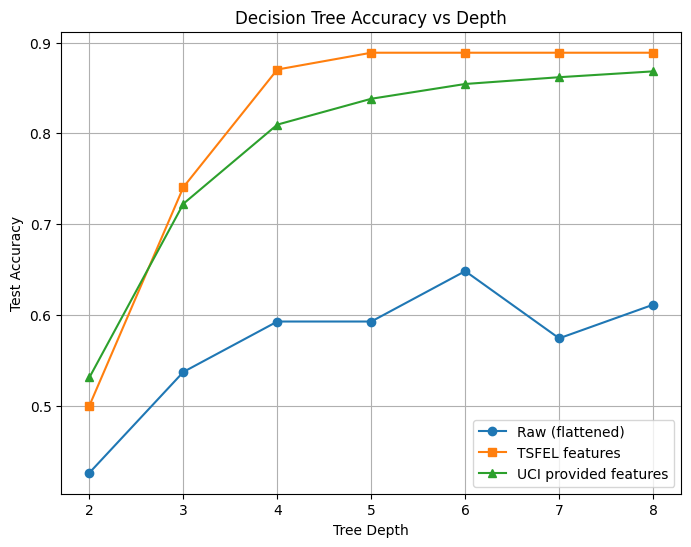

In [14]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import MakeDataset  # uses your MakeDataset.py
import warnings 
import tsfel

X_train_raw = MakeDataset.X_train.reshape(MakeDataset.X_train.shape[0], -1)
X_test_raw  = MakeDataset.X_test.reshape(MakeDataset.X_test.shape[0], -1)
y_train_raw = MakeDataset.y_train
y_test_raw  = MakeDataset.y_test


cfg = tsfel.get_features_by_domain()

def extract_features(X):
    feature_dfs = []
    sampling_frequency=50
    for i in range(X.shape[0]):
        df = pd.DataFrame(X[i], columns=['accx','accy','accz'])
        
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", UserWarning) # Ignore UserWarnings within this block
            # Pass the sampling frequency to the extractor
            f_x = tsfel.time_series_features_extractor(cfg, df['accx'], sf=sampling_frequency, verbose=0)
            f_y = tsfel.time_series_features_extractor(cfg, df['accy'], sf=sampling_frequency, verbose=0)
            f_z = tsfel.time_series_features_extractor(cfg, df['accz'], sf=sampling_frequency, verbose=0)
        features = pd.concat([f_x, f_y, f_z], axis=1)
        feature_dfs.append(features)
    return pd.concat(feature_dfs, axis=0).reset_index(drop=True)

X_train_tsfel = extract_features(MakeDataset.X_train)
X_test_tsfel  = extract_features(MakeDataset.X_test)
y_train_tsfel = y_train_raw
y_test_tsfel  = y_test_raw

train_path = "./UCI HAR Dataset/train/"
test_path  = "./UCI HAR Dataset/test/"

X_train_ucl = pd.read_csv(train_path + "X_train.txt", delim_whitespace=True, header=None)
X_test_ucl  = pd.read_csv(test_path  + "X_test.txt",  delim_whitespace=True, header=None)
y_train_ = pd.read_csv(train_path + "y_train.txt", delim_whitespace=True, header=None).values.ravel()
y_test_uci  = pd.read_csv(test_path  + "y_test.txt",  delim_whitespace=True, header=None).values.ravel()

def test_depths(X_train, y_train, X_test, y_test, label):
    depths = range(2, 9)
    accuracies = []
    for d in depths:
        clf = DecisionTreeClassifier(max_depth=d, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
      #  print(f"{label} | Depth={d} | Accuracy={acc:.4f}")
    return list(depths), accuracies

depths_raw, acc_raw = test_depths(X_train_raw, y_train_raw, X_test_raw, y_test_raw, "Raw (flattened)")
depths_tsfel, acc_tsfel = test_depths(X_train_tsfel, y_train_tsfel, X_test_tsfel, y_test_tsfel, "TSFEL Features")
depths_uci, acc_uci = test_depths(X_train_uci, y_train_uci, X_test_uci, y_test_uci, "UCI Provided Features")


plt.figure(figsize=(8,6))
plt.plot(depths_raw, acc_raw, marker='o', label="Raw (flattened)")
plt.plot(depths_tsfel, acc_tsfel, marker='s', label="TSFEL features")
plt.plot(depths_uci, acc_uci, marker='^', label="UCI provided features")

plt.xlabel("Tree Depth")
plt.ylabel("Test Accuracy")
plt.title("Decision Tree Accuracy vs Depth")
plt.legend()
plt.grid(True)
plt.show()


3.Are there any participants/ activitivies where the Model performace is bad? If Yes, Why? [0.5 mark]

 Ans :- The model performs badly on Walking, Walking Upstairs, and Walking Downstairs, which are frequently misclassified with each other. This is because their accelerometer patterns are very similar and only small deference in step angle, intensity.
It also occasionally confuses Sitting vs Standing, as both are static activities with similar signals dominated by gravity, making them hard to separate.
Additionally, variations in how different participants perform the same activity contribute to errors.
So yes, certain participants and activities show poorer performance due to overlapping signal patterns and variability.
Class sitting is sometimes confused with class Laying  and Walking.
Class Walking and Walking Upstairs are sometimes confused with each other. 
Class Walking Downstairs appears to be perfectly classified with no misclassifications in this test set can be seen in confusion matrix